Create Multilevel Piechart for MSFD Descriptors and indicators.

Libaries and Files

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

descriptor = pd.read_csv (r'C:\Users\marrigan\Work\Jupyter_Notebooks\MSFD_Pie\data\descriptor.csv')
code = pd.read_csv (r'C:\Users\marrigan\Work\Jupyter_Notebooks\MSFD_Pie\data\code.csv')
indicators = pd.read_csv (r'C:\Users\marrigan\Work\Jupyter_Notebooks\MSFD_Pie\data\indicators.csv')

Colours

In [2]:
# For Legend and peripherals
c_ges_a = '#31F08E'
c_ges_pa = '#F0A622'
c_ges_na = '#e34732'
c_ges_u = '#f2f2f2'
c_ges_nt = '#7d7d7d'
c_circ = '#1c1c1c'
c_circ_txt = '#ffffff'

#for dfs
colours = {'c_ges_a' : '#31F08E',
           'c_ges_pa' : '#F0A622', 
           'c_ges_na' : '#e34732', 
           'c_ges_u' : '#f2f2f2', 
           'c_ges_nt' : '#7d7d7d', 
           'c_circ' : '#1c1c1c', 
           'c_circ_txt' : '#ffffff'}

descriptor['colour'] = descriptor['descriptor_colour'].map(colours)
code['colour'] = code['code_colour'].map(colours)
indicators['colour'] = indicators['indicators_colour'].map(colours)

Setting inputs

Any new lines for text wrapping will need to be put into csv files as xoxo

In [3]:
descriptor_label = descriptor['descriptor_label']
descriptor_label = [w.replace('xoxo', '\n') for w in descriptor_label]    
descriptor_colour = descriptor['colour']
descriptor_weight = descriptor['descriptor_weight']

#-----------------------------------------------------------------------------------------------------------------------

code_label = code['code_label']
#description_label = code['description_label'] ---------not used
code_colour = code['colour']
code_weight = code['code_weight']

#-----------------------------------------------------------------------------------------------------------------------

indicators_label = indicators['indicators_label']
indicators_label = [w.replace('xoxo', '\n') for w in indicators_label]  
indicators_colour = indicators['colour']
indicators_weight = indicators['indicators_weight']


Data creation
Insure lists are same length and weights follow each level.

Draw 3 pie charts on top of eachother with a circle in the middle to cut out interior.

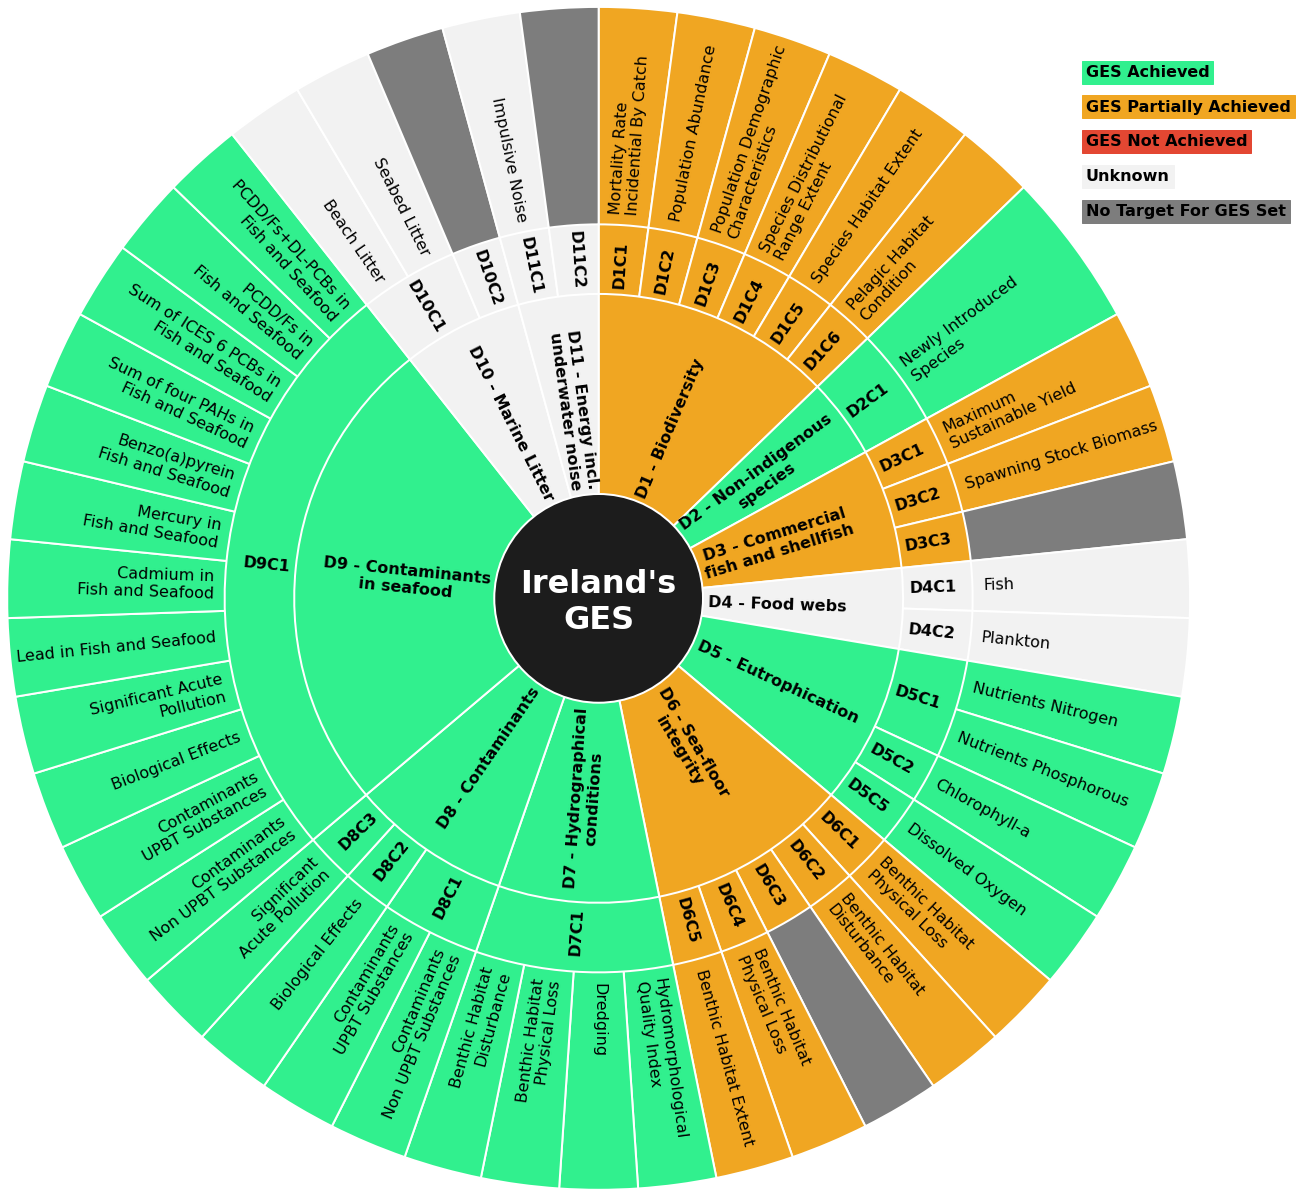

In [4]:
level_3 = plt.pie(indicators_weight, 
                  labels=indicators_label,
                  colors=indicators_colour,
                  labeldistance=(.65),
                  radius=6.8,
                  counterclock= False,
                  startangle= 90,
                  rotatelabels= True,
                  wedgeprops = {'linewidth': 2, 'ec':'#ffffff'},
                  textprops = {'fontsize': 16, 'rotation_mode':'anchor', 'va':'center', 'wrap':'True'}
                 )

level_2 = plt.pie(code_weight, 
                  labels=code_label,
                  colors=code_colour,
                  labeldistance=(.83),
                  radius=4.3,
                  counterclock= False,
                  startangle= 90,
                  rotatelabels= True,
                  wedgeprops = {'linewidth': 2, 'ec':'#ffffff'},
                  textprops = {'fontsize': 16, 'rotation_mode':'anchor', 'va':'center', 'ma':'center', 'fontweight':'bold', 'wrap':'True'}
                 )

level_1 = plt.pie(descriptor_weight, 
                  labels=descriptor_label,
                  colors=descriptor_colour,
                  labeldistance=(.360),
                  radius= 3.5,
                  counterclock= False,
                  startangle= 90,
                  rotatelabels= True,
                  wedgeprops = {'linewidth': 2, 'ec':'#ffffff'},
                  textprops = {'fontsize': 16, 'rotation_mode':'anchor', 'va':'center', 'ma':'center', 'fontweight':'bold', 'wrap':'True'}                 
                 )


#-----------------------------------------------------------------------------------------------------------------------

centre_circle = plt.Circle((0, 0), 1.2, color=c_circ, linewidth=2, ec='#ffffff')

### Circle text
plt.text(0,-0.35, 'Ireland\'s\nGES',fontsize=32, c=c_circ_txt,fontweight='bold', ha='center', ma='center')

### Legend text
plt.text(5.6,6.0, 'GES Achieved', fontsize=16,fontweight='bold',backgroundcolor=c_ges_a)
plt.text(5.6,5.6, 'GES Partially Achieved', fontsize=16,fontweight='bold',backgroundcolor=c_ges_pa)
plt.text(5.6,5.2, 'GES Not Achieved', fontsize=16,fontweight='bold',backgroundcolor=c_ges_na)
plt.text(5.6,4.8, 'Unknown', fontsize=16,fontweight='bold',backgroundcolor=c_ges_u)
plt.text(5.6,4.4, 'No Target For GES Set', fontsize=16,fontweight='bold',backgroundcolor=c_ges_nt,clip_box='yes')

fig = plt.gcf()

fig.set_facecolor('white')

fig.gca().add_artist(centre_circle)

fig.savefig('MSFD_Pie.png', bbox_inches = 'tight')

